In [1]:
from got10k.trackers import Tracker
from got10k.experiments import ExperimentGOT10k

In [2]:
import os
import sys
import cv2
import torch
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

sys.path.append('/home/hyunjoon/github/tracking-pytorch/')

In [3]:
from pysot.config import cfg
from pysot.models.model_builder import ModelBuilder
from pysot.tracker.tracker_builder import build_tracker
from pysot.utils.bbox import get_axis_aligned_bbox, IoU
from pysot.utils.model_load import load_pretrain
from toolkit.datasets import DatasetFactory
# from pysot.models.head.xcorr import corr_attention

In [4]:
torch.set_num_threads(1)
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [5]:
path_got10k = '/home/hyunjoon/dataset/got-10k/'
# fn_config = 'experiments/baseline/config.yaml'
# snapshot = 'experiments/baseline/snapshot/checkpoint_e99.pth'
fn_config = '/home/hyunjoon/github/tracking-pytorch/experiments/siamcar_mobilenetv2_2gpu/config.yaml'
snapshot = '/home/hyunjoon/github/tracking-pytorch/experiments/siamcar_mobilenetv2_2gpu/snapshot/checkpoint_e20.pth'

In [6]:
cfg.merge_from_file(fn_config)
# cfg.TRACK.LR = 0.1
# cfg.TRACK.WINDOW_INFLUENCE = 0.42

# create model
model = ModelBuilder()

# load model
model = load_pretrain(model, snapshot).cuda().eval()

# build tracker
car_tracker = build_tracker(model)

In [7]:
class GOT10kTracker(Tracker):
    def __init__(self, tracker, name='GOT10kTracker'):
        super(GOT10kTracker, self).__init__(name=name)
        self.tracker = tracker
    
    def init(self, img, bbox):
        im = np.array(img)[:, :, ::-1]
        self.tracker.init(im, bbox)
        self.bbox = bbox
        
#         res = self.tracker.track(im)
#         rbb = np.array(res['bbox'])
#         best_idx = res['best_idx']
        
#         ix = best_idx % 25
#         iy = best_idx // 25
#         pos_mask = np.zeros((25, 25), dtype=np.float32)
#         pos_mask[iy-1:iy+2, ix-1:ix+2] = 1.0
#         pos_mask = torch.Tensor(np.reshape(pos_mask, (1, 1, 25, 25)))
#         neg_mask = np.ones((25, 25), dtype=np.float32)
#         neg_mask[iy-3:iy+4, ix-3:ix+4] = 0.0
#         neg_mask = torch.Tensor(np.reshape(neg_mask, (1, 1, 25, 25)))

#         atts = [corr_attention(torch.Tensor(c), pos_mask, neg_mask) for c in res['corrs']]
        
#         self.tracker.atts = [att.cuda() for att in atts]
        
    def update(self, img):
        im = np.array(img)[:, :, ::-1]
        res = self.tracker.track(im)
        
        rbb = np.array(res['bbox'])
        best_idx = res['best_idx']
        
#         ix = best_idx % 25
#         iy = best_idx // 25
#         pos_mask = np.zeros((25, 25), dtype=np.float32)
#         pos_mask[iy-1:iy+2, ix-1:ix+2] = 1.0
#         pos_mask = torch.Tensor(np.reshape(pos_mask, (1, 1, 25, 25)))
#         neg_mask = np.ones((25, 25), dtype=np.float32)
#         neg_mask[iy-3:iy+4, ix-3:ix+4] = 0.0
#         neg_mask = torch.Tensor(np.reshape(neg_mask, (1, 1, 25, 25)))

#         atts = [corr_attention(torch.Tensor(c), pos_mask, neg_mask) for c in res['corrs']]
        
#         self.tracker.atts = [0.9 * a0 + 0.1 * a1.cuda() for a0, a1 in zip(self.tracker.atts, atts)]
            
        self.bbox = rbb.tolist()
        return self.bbox

In [8]:
tracker = GOT10kTracker(car_tracker, name='siamcar_0727')

In [9]:
# setup experiment (validation subset)
experiment = ExperimentGOT10k(
    root_dir=path_got10k,    # GOT-10k's root directory
    subset='val',               # 'train' | 'val' | 'test'
    result_dir='results',       # where to store tracking results
    report_dir='reports'        # where to store evaluation reports
)
experiment.repetitions = 1
experiment.run(tracker, visualize=False)

Running tracker siamcar_0727 on GOT-10k...
--Sequence 1/180: GOT-10k_Val_000001
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000001/GOT-10k_Val_000001_001.txt
--Sequence 2/180: GOT-10k_Val_000002
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000002/GOT-10k_Val_000002_001.txt
--Sequence 3/180: GOT-10k_Val_000003
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000003/GOT-10k_Val_000003_001.txt
--Sequence 4/180: GOT-10k_Val_000004
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000004/GOT-10k_Val_000004_001.txt
--Sequence 5/180: GOT-10k_Val_000005
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000005/GOT-10k_Val_000005_001.txt
--Sequence 6/180: GOT-10k_Val_000006
 Repetition: 1
  Results recorded at results/GOT-10k/siamcar_0727/GOT-10k_Val_000006/GOT-10k_Val_000006_001.txt
--Sequence 7/180: GOT-10k_Val_000007
 Repetition: 1
  Results r

Evaluating siamcar_0727
Saving success plots to reports/GOT-10k/siamcar_0727/success_plot.png


{'siamcar_0727': {'overall': {'ao': 0.5943474520720273,
   'sr': 0.7225161104164662,
   'speed_fps': 37.300447633332446,
   'succ_curve': [0.9215639126671155,
    0.919688371645667,
    0.9178609214196403,
    0.9156487448302395,
    0.9130518418774647,
    0.9104549389246898,
    0.908627488698663,
    0.9049725882466096,
    0.9021833221121477,
    0.8989131480234683,
    0.8945368856400885,
    0.891266711551409,
    0.8877560834856209,
    0.883379821102241,
    0.8801577378089833,
    0.8765028373569299,
    0.8734731172453593,
    0.8700586707704145,
    0.8675098586130615,
    0.8649610464557084,
    0.8628450514571511,
    0.8602481485043763,
    0.8564489756660575,
    0.8529383476002693,
    0.8498124458978551,
    0.8463979994229105,
    0.8428873713571222,
    0.8391362893142252,
    0.8362027507934982,
    0.8323554871597576,
    0.8278830431855343,
    0.8245647783014332,
    0.8203808790997403,
    0.8158122535346735,
    0.8110031739924979,
    0.8074925459267096,
    0

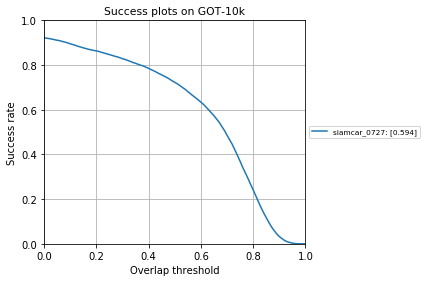

In [10]:
experiment.report([tracker.name])